## Company bankrupt predictive models 

### Importing the libraries 

In [10]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection  import train_test_split 
from sklearn.model_selection import cross_val_score

# 

### Importing the Dataset 

In [11]:
df = pd.read_csv(r"C:\Users\hp\Downloads\data.csv")

## 

### checking the dataset information 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## 

### checking the null values in the dataset 

In [13]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

## 

### checking the Outliers in the dataset 

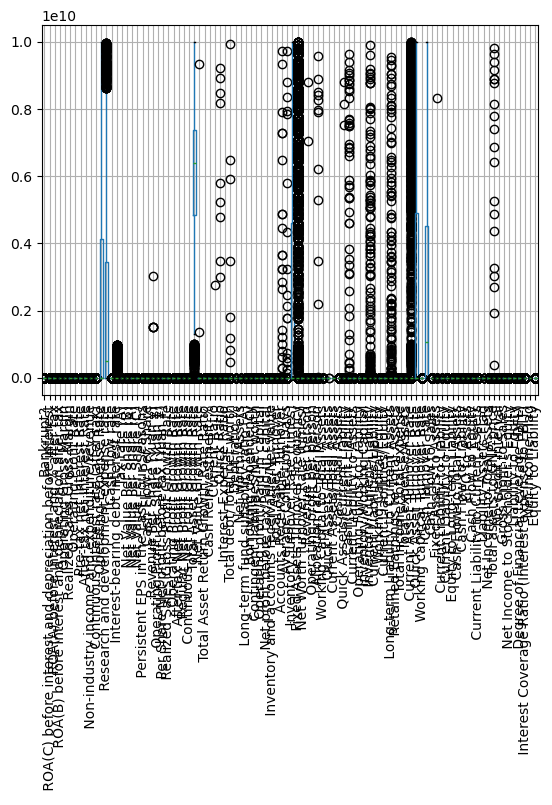

In [14]:
df.boxplot()
plt.xticks(rotation =90 )
plt.show()

## 

### features Extraction from the main databased

### The following all are extracted features

#### the feature are selected based on the requirement to predict the company are bankrupting so this is the important factores
- Financial Health Indicators : Features like ROA, current ratio, and cash flow measure profitability and liquidity, which directly show if a company is financially stable.
- Risk & Debt Management – Debt ratio and interest rate features capture how much risk the company takes through borrowing.
- Performance Trends – Growth rate and profit margin features show whether the company’s performance is improving or declining over time.
- Predictive Power – These features are proven in finance research to strongly influence bankruptcy likelihood, making them reliable predictors.

In [15]:
columns = ['Bankrupt?',
    ' ROA(C) before interest and depreciation before interest',
    ' ROA(A) before interest and % after tax',
    ' ROA(B) before interest and depreciation after tax',
    ' Operating Gross Margin',
    ' Operating Profit Rate',
    ' Net Income to Total Assets',
    ' Gross Profit to Sales',
    " Net Income to Stockholder's Equity",
    ' Debt ratio %',
    ' Total debt/Total net worth',
    ' Liability to Equity',
    ' Equity to Liability',
    ' Degree of Financial Leverage (DFL)',
    ' Interest Coverage Ratio (Interest expense to EBIT)',
    ' Current Ratio',
    ' Quick Ratio',
    ' Cash/Total Assets',
    ' Cash/Current Liability',
    ' Total Asset Turnover',
    ' Inventory Turnover Rate (times)',
    ' Accounts Receivable Turnover',
    ' Working Capital to Total Assets',
    ' Cash Flow to Total Assets',
    ' CFO to Assets',
    ' Cash Flow to Equity',
    ' Cash Flow to Liability',
    ' Operating Profit Growth Rate'
]


In [16]:
features = df[columns]

# 

### Rechecking the Outliers on the new features 

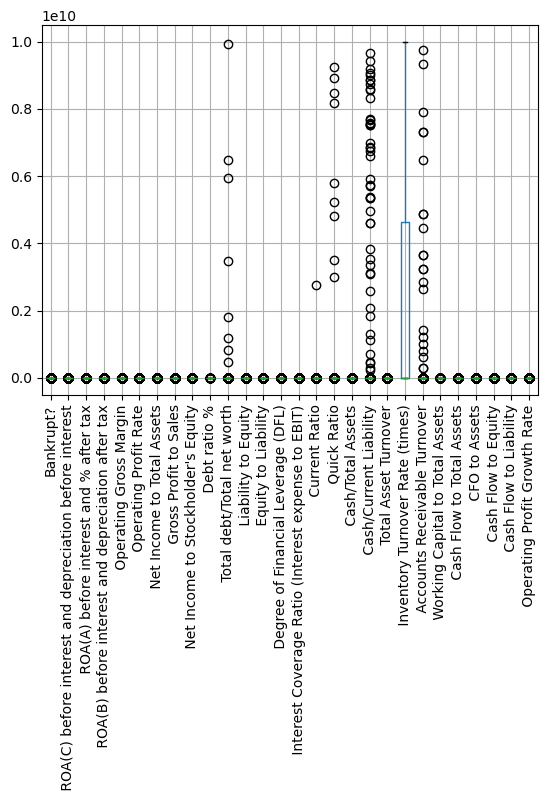

In [17]:
features.boxplot()
plt.xticks(rotation = 90)
plt.show()

# 

### Balancing the outliers by using the Interquartile range 

In [18]:
def balancing_outliers(dataset_name: pd.DataFrame) -> pd.DataFrame:
    numeric_columns = dataset_name.select_dtypes(include=["int", "float"]).columns
    for col in numeric_columns:
        Q1 = dataset_name[col].quantile(0.25)
        Q3 = dataset_name[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_wisker = Q1 - 1.5 * IQR
        upper_wisker = Q3 + 1.5 * IQR
        median_value = dataset_name[col].median()
        dataset_name.loc[dataset_name[col] < lower_wisker, col] = median_value
        dataset_name.loc[dataset_name[col] > upper_wisker, col] = median_value
    
    return dataset_name


# 

### The feature 'Bankrupt' does not have any outliers and this feature is important to classify which companies are bankrupt or not 

In [19]:
new_features = balancing_outliers(features.drop('Bankrupt?',axis = 1))

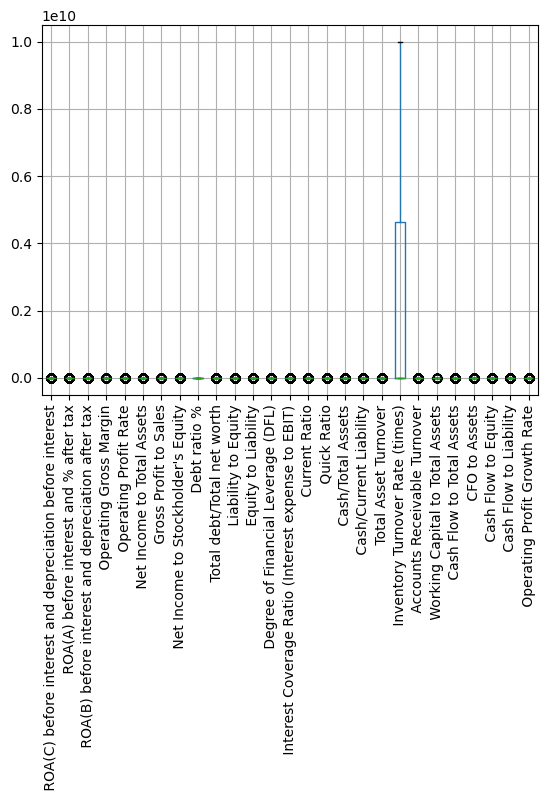

In [20]:
new_features.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [21]:
def scale_data(dataset: pd.DataFrame) -> pd.DataFrame:
    numeric_columns = dataset.select_dtypes(include=["int", "float"]).columns
    scaler = StandardScaler()
    dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])
    return dataset


In [22]:
new_features = scale_data(new_features)

# 

### checking the correlation of the features 

In [26]:
new_features.corr()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Operating Profit Rate,Net Income to Total Assets,Gross Profit to Sales,Net Income to Stockholder's Equity,Debt ratio %,Total debt/Total net worth,...,Cash/Current Liability,Total Asset Turnover,Inventory Turnover Rate (times),Accounts Receivable Turnover,Working Capital to Total Assets,Cash Flow to Total Assets,CFO to Assets,Cash Flow to Equity,Cash Flow to Liability,Operating Profit Growth Rate
ROA(C) before interest and depreciation before interest,1.000000,0.830925,0.923608,0.437662,0.620554,0.804662,0.437661,0.748745,-0.208109,-0.175576,...,0.225766,0.239500,-0.059558,0.078443,0.236914,0.136362,0.412085,0.131220,0.113599,0.272439
ROA(A) before interest and % after tax,0.830925,1.000000,0.861958,0.407159,0.600069,0.920570,0.407160,0.823677,-0.192567,-0.165058,...,0.195852,0.259798,-0.055902,0.072052,0.278025,0.125378,0.311182,0.123164,0.114845,0.270565
ROA(B) before interest and depreciation after tax,0.923608,0.861958,1.000000,0.443507,0.617897,0.826485,0.443508,0.760543,-0.211727,-0.178569,...,0.224749,0.229835,-0.052836,0.086111,0.236546,0.135931,0.395789,0.134714,0.114118,0.278916
Operating Gross Margin,0.437662,0.407159,0.443507,1.000000,0.572383,0.427971,1.000000,0.376591,-0.346285,-0.298618,...,0.205911,-0.077495,0.110973,-0.031371,0.308600,0.072503,0.305473,0.069129,0.053942,0.184931
Operating Profit Rate,0.620554,0.600069,0.617897,0.572383,1.000000,0.604602,0.572385,0.563469,-0.218616,-0.191032,...,0.179630,0.066643,0.012983,0.012276,0.259928,0.089919,0.329373,0.091833,0.072807,0.277938
Net Income to Total Assets,0.804662,0.920570,0.826485,0.427971,0.604602,1.000000,0.427973,0.845135,-0.241935,-0.215486,...,0.216744,0.257370,-0.059848,0.067835,0.301429,0.116310,0.346117,0.113786,0.106924,0.260980
Gross Profit to Sales,0.437661,0.407160,0.443508,1.000000,0.572385,0.427973,1.000000,0.376591,-0.346290,-0.298622,...,0.205912,-0.077504,0.110974,-0.031367,0.308609,0.072509,0.305473,0.069133,0.053944,0.184930
Net Income to Stockholder's Equity,0.748745,0.823677,0.760543,0.376591,0.563469,0.845135,0.376591,1.000000,-0.068255,-0.075383,...,0.146332,0.310034,-0.075676,0.076281,0.241366,0.133893,0.305813,0.136859,0.101206,0.280716
Debt ratio %,-0.208109,-0.192567,-0.211727,-0.346285,-0.218616,-0.241935,-0.346290,-0.068255,1.000000,0.819400,...,-0.402667,0.151994,-0.041651,-0.048449,-0.471365,-0.031573,-0.267885,-0.037590,-0.048116,0.025484
Total debt/Total net worth,-0.175576,-0.165058,-0.178569,-0.298618,-0.191032,-0.215486,-0.298622,-0.075383,0.819400,1.000000,...,-0.357184,0.133941,-0.019210,-0.058126,-0.371746,-0.028275,-0.222573,-0.031367,-0.039633,0.011900


#

### spliting the Data into Traing and testing data 

In [27]:
from sklearn.model_selection  import train_test_split 

In [28]:
X =  new_features

In [29]:
y = features["Bankrupt?"]

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 42 , test_size = 0.20)

# 

## Training the Classification models

# Logistic Regression

In [31]:
LR = LogisticRegression()

In [32]:
y_train.value_counts()

Bankrupt?
0    5286
1     169
Name: count, dtype: int64

In [33]:
y_test.value_counts()

Bankrupt?
0    1313
1      51
Name: count, dtype: int64

#### 

### For solving the bias we used the SMOTE function to balance the data 

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE(random_state = 42)

In [36]:
x_res,y_res = sm.fit_resample(X,y)

In [37]:
y_res.value_counts()

Bankrupt?
1    6599
0    6599
Name: count, dtype: int64

In [38]:
LR.fit(x_res,y_res)

LogisticRegression()

In [39]:
y_pred = LR.predict(x_test)

In [40]:
confusion_matrix(y_test,y_pred)

array([[1077,  236],
       [   3,   48]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pred)

0.8247800586510264

In [42]:
y_test.value_counts()

Bankrupt?
0    1313
1      51
Name: count, dtype: int64

In [43]:
pd.Series(y_pred).value_counts()

0    1080
1     284
Name: count, dtype: int64

In [44]:
f1_score(y_test,y_pred)

0.2865671641791045

In [45]:
recall_score(y_test,y_pred)

0.9411764705882353

# 

# KNN Classifier

In [46]:
KNN = KNeighborsClassifier(n_neighbors=2, n_jobs = -1)

In [47]:
KNN.fit(x_res,y_res)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [48]:
y_prediction = KNN.predict(x_test)

In [49]:
pd.Series(y_prediction).value_counts()

0    1313
1      51
Name: count, dtype: int64

In [50]:
confusion_matrix(y_test,y_prediction)

array([[1313,    0],
       [   0,   51]], dtype=int64)

In [51]:
accuracy_score(y_test,y_prediction)

1.0

In [52]:
f1_score(y_test,y_prediction)

1.0

#### 

#### Now we used the cross validation for testing the model via providing the multiple input and checking the accuracy of the model 

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, x_res, y_res, cv=5, scoring='accuracy')
print(scores, scores.mean())


[0.94242424 0.93977273 0.97575758 0.9806745  0.98294809] 0.9643154259533571


In [69]:
from sklearn.metrics import accuracy_score
train_pred = KNN.predict(x_res)
test_pred = KNN.predict(x_test)

print("Train Accuracy:", accuracy_score(y_res, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))


Train Accuracy: 0.9385512956508562
Test Accuracy: 0.9758064516129032


# 

# Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth = 17, class_weight = 'balanced' , random_state = 42)

In [72]:
DTC.fit(x_res,y_res)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=17, random_state=42)

In [73]:
y_pred_DTC = DTC.predict(x_test)

In [74]:
pd.Series(y_pred_DTC).value_counts()

0    1300
1      64
Name: count, dtype: int64

In [75]:
accuracy_score(y_test,y_pred_DTC)

0.9904692082111437

In [76]:
confusion_matrix(y_test,y_pred_DTC)

array([[1300,   13],
       [   0,   51]], dtype=int64)

In [77]:
print(classification_report(y_test,y_pred_DTC))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1313
           1       0.80      1.00      0.89        51

    accuracy                           0.99      1364
   macro avg       0.90      1.00      0.94      1364
weighted avg       0.99      0.99      0.99      1364



In [78]:
f1_score(y_test,y_pred_DTC)

0.8869565217391304

# 

# Random Forest Classifier

In [79]:
RFC = RandomForestClassifier(n_estimators = 10, criterion='entropy',max_depth = 17, class_weight = 'balanced' , random_state = 42)

In [80]:
RFC.fit(x_res,y_res)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=17, n_estimators=10, random_state=42)

In [81]:
y_pred_RFC = RFC.predict(x_test)

In [82]:
print(classification_report(y_test,y_pred_RFC))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1313
           1       0.82      1.00      0.90        51

    accuracy                           0.99      1364
   macro avg       0.91      1.00      0.95      1364
weighted avg       0.99      0.99      0.99      1364



In [83]:
accuracy_score(y_test,y_pred_RFC)

0.9919354838709677

In [84]:
f1_score(y_test,y_pred_RFC)

0.9026548672566371

# 

## Conclusion:
- After testing all the models I choosed the KNN model because it was more accurate than other algorithm
- For KNN accuracy score was 1 and f1 score was also close to 1 because of these conditions we choose this model 

# 